# Machine Learning - Application to Wine 
## Exercise 1: Multinomial Logit

In [155]:
import numpy as np
import pandas as pd

drink_data = pd.read_csv('./data/strongdrink.txt')

# y = drink_data[drink_data['cultivar'] < 3]['cultivar'].values - 1
y =  pd.get_dummies(drink_data['cultivar'], drop_first=True).values
print(y)
print(y.sum(axis=0))
X = drink_data.drop(['cultivar'], axis=1).values


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]

In [136]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.25,
random_state=20)



In [170]:
def logit(X_train, y_train):
    LogReg = []
    for i in range(y_train.shape[1]):
        LogReg.append(LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000))
        LogReg[i].fit(X_train, y_train[:,i])
#         print('For j equals to %i' % i)
#         print("Constant: \t" , LogReg[i].intercept_[0])
#         print("Coefficients: \n", LogReg[i].coef_[0])
    return LogReg

LogReg = logit(X_train, y_train)
print(LogReg)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)]


In [166]:
def predict(X_test, LogReg):
    y_pred = np.empty((X_test.shape[0], len(LogReg)))
    for i,item in enumerate(LogReg):

        y_pred[:,i] = LogReg[i].predict(X_test)

    return y_pred

y_pred = predict(X_test, LogReg)
print(y_pred - y_test)
print(1 - np.abs((y_pred - y_test)).sum(axis=0)/y_pred.shape[0])

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-1.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[0.97727273 1.        ]


In [167]:
def get_precision(y_test, y_pred):
    precision = np.empty(y_pred.shape[1])
    for i in range(y_pred.shape[1]):
        j = i + 1
#         print("Classification report for j equals to %i" % j)
#         print(classification_report(y_test[:,i], y_pred[:,i]))
        output = classification_report(y_test[:,i], y_pred[:,i], output_dict = True)
        #print(output)
        precision[i] = output[str(i)]['precision']
    return precision
              
precision = get_precision(y_test, y_pred)
print(precision)
error = 1 - precision
print(error)

[0.95833333 1.        ]
[0.04166667 0.        ]


The most accurate prediction is for $j = 2$ which is not the one with the largest sample size.

In [139]:
from sklearn.metrics import mean_squared_error

def mean_squared(y_test, y_pred):
    MSE = np.empty(y_pred.shape[1])
    for i in range(y_pred.shape[1]):
        MSE[i] = mean_squared_error(y_test[:,i],y_pred[:,i])
    return MSE

MSE = mean_squared(y_test, y_pred)
print(MSE)

[0.02272727 0.        ]


## Question 1.b: Leave one out Cross-Validation

In [173]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import precision_score

def LOOCV(X,y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    MSE = np.empty((loo.get_n_splits(X),y.shape[1]))
    errorlist = []
    i = 0
    for train_index, test_index in loo.split(X):
        # Fit model
        LogReg = logit(X[train_index] , y[train_index])
        
        #Predict data
        y_pred =  predict(X[test_index], LogReg)
        
        precision = precision_score(y[test_index], y_pred, average=None)
        errorlist.append(1 - precision)
        
        MSE[i,:] = mean_squared(y[test_index], y_pred)
        i += 1
        
    CV = MSE.mean(axis=0)
    return CV, errorlist
    
CV, error = LOOCV(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [172]:
print(CV)

[0.04545455 0.02272727]


## Question 1.c: K-fold cross-validation

In [179]:
from sklearn.model_selection import KFold


def CV(X,y, method='KFold'):
    if method=='LOO':
        CV = LeaveOneOut()
        CV.get_n_splits(X)
    elif method == 'KFold':
        CV = KFold(n_splits=4, shuffle=True, random_state=10)
        CV.get_n_splits(X)
        
    MSE = np.empty((CV.get_n_splits(X),y.shape[1]))
    errorlist = []
    i = 0
    for train_index, test_index in CV.split(X):
        # Fit model
        LogReg = logit(X[train_index] , y[train_index])
        
        #Predict data
        y_pred =  predict(X[test_index], LogReg)
        
        precision = precision_score(y[test_index], y_pred, average=None)
        errorlist.append(1 - precision)
        
        MSE[i,:] = mean_squared(y[test_index], y_pred)
        i += 1
        
    Meansqrerr = MSE.mean(axis=0)
    return Meansqrerr, errorlist


CV, error =  CV(X,y, method='KFold')






1
2
3
4


In [176]:
print(CV)

[0.05681818 0.02840909]


In [177]:
print(error)

[array([0.05263158, 0.2       ]), array([0.15384615, 0.        ]), array([0.        , 0.07692308]), array([0., 0.])]


## Question 2: Decision Trees

In [180]:
biden_data = pd.read_csv('./data/biden.csv')
biden_data

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1
5,85,1,27,16,1,0
6,60,1,28,12,0,0
7,50,0,31,15,1,0
8,50,1,32,13,0,0
9,70,0,51,14,1,0


In [182]:
y = biden_data['biden'].values
print(y)
X = biden_data.drop(['biden'], axis=1).values

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.3,
random_state=25)

[90 70 60 ... 70 60 15]


In [183]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [186]:
from sklearn.tree import export_graphviz
import graphviz

biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    # feature_names=iris.feature_names[2:],
    # class_names=iris.target_names,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

ModuleNotFoundError: No module named 'graphviz'

In [185]:
y_pred = biden_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 392.7116895977868


## Question 2.b: Tune hyperparameter

In [189]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist1 = {'max_depth': [3, 10],
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(2, 20)}

# Run randomized hyperparameter search
random_search1 = \
    RandomizedSearchCV(biden_tree, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search1.fit(X, y)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RandBestParams1= {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
RandBestScore1= 401.6903602232667


## Question 2.c: Random Forest

In [191]:
from sklearn.ensemble import RandomForestRegressor

# Fit the random forest first
B4 =100
m4 = 4
biden_tree2 = RandomForestRegressor(n_estimators=B4, max_features=m4, bootstrap=True,
                                  n_jobs=-1, oob_score=True, random_state=25)
biden_tree2.fit(X, y)
print('OOB score=', biden_tree2.score(X, y))
y_pred2 = biden_tree2.oob_prediction_
MSE2 = mean_squared_error(y, y_pred2)
print('MSE=', MSE2)

OOB score= 0.7007385123549247
MSE= 533.5736881299662


In [193]:
# Fine tune hyperparameters

#declare distribution
param_dist2 = {'n_estimators': [10, 200],
    'max_depth': [3, 10],
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(2, 20), 
    'max_features': sp_randint(1, 5)}

# Run randomized hyperparameter search
random_search2 = \
    RandomizedSearchCV(biden_tree2, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search2.fit(X, y)
print('RandBestEstimator1=', random_search2.best_estimator_)
print('RandBestParams1=', random_search2.best_params_)
print('RandBestScore1=', -random_search2.best_score_)

RandBestEstimator1= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
RandBestParams1= {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
RandBestScore1= 397.0681090117028


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


## Question 3: The Horse Race

In [267]:
auto_data = pd.read_csv('./data/auto.csv')
auto_data['mpg_high'] = (auto_data['mpg'] > auto_data['mpg'].median())*1
# cols = X.select_dtypes(exclude=['float']).columns
auto_data['horsepower'] = auto_data['horsepower'].apply(pd.to_numeric, downcast='float', errors='coerce')
auto_data.dropna(inplace=True)


X = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
print(X.dtypes)
X[['origin1', 'origin2']] =  pd.get_dummies(auto_data['origin'], drop_first=True)
X = X.drop(['origin'], axis=1).values

y = np.asarray(auto_data[['mpg_high']]).flatten()
print(y.shape)


cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object
(392,)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [268]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.50,
random_state=20)

LogReg =  LogisticRegression(solver='lbfgs', \
                                     multi_class='multinomial', max_iter=2000)
        
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
mean_squared_error(y_test, y_pred)

0.12755102040816327

In [269]:
# LogReg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
# LogReg.fit(X_train, y_train[:,i])


def kf(X,y, N, method='KFold'):
    if method=='LOO':
        CV = LeaveOneOut()
        CV.get_n_splits(X)
    elif method == 'KFold':
        CV = KFold(n_splits=N, shuffle=True, random_state=25)
        CV.get_n_splits(X)
        
    MSE = np.empty((CV.get_n_splits(X)))
    errorlist = np.empty((CV.get_n_splits(X),2))
    i = 0
    for train_index, test_index in CV.split(X):
        # Fit model
        LogReg =  LogisticRegression(solver='lbfgs', \
                                     multi_class='multinomial', max_iter=2000)
        
        LogReg.fit(X[train_index], y[train_index])
        
        #Predict data
        y_pred =  LogReg.predict(X[test_index])
        
        precision = precision_score(y[test_index], y_pred, average=None)
#         print(precision)
        errorlist[i,:] = (1 - precision)
        
        MSE[i] = mean_squared_error(y[test_index], y_pred)
        i += 1
        
    Meansqrerr = MSE.mean(axis=0)
    Meanserror = errorlist.mean(axis=0)
    
    return Meansqrerr, Meanserror


CV, error =  kf(X,y, 4, method='KFold')
print(CV)
CV, error =  kf(X,y, 10, method='KFold')
print(CV)

0.10459183673469387
0.11698717948717949


## Question 3.b: Using Random Forest

In [270]:
from sklearn.ensemble import RandomForestClassifier
# Fit the random forest first
B4 =100
m4 = 4
auto_tree = RandomForestClassifier(n_estimators=B4, max_features=m4, bootstrap=True,
                                  n_jobs=-1, oob_score=True, random_state=25)
auto_tree.fit(X_train, y_train)
print('OOB score=', auto_tree.score(X_test, y_test))
y_pred2 = auto_tree.predict(X_test)
MSE2 = mean_squared_error(y_test, y_pred2)
print('MSE=', MSE2)

OOB score= 0.9438775510204082
MSE= 0.05612244897959184


In [271]:
# Randomizing to tune the hyperparameters

# Fine tune hyperparameters

#declare distribution
param_dist3 = {'n_estimators': [10, 200],
    'max_depth': [3, 8],
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(2, 20), 
    'max_features': sp_randint(1, 8)}

# Run randomized hyperparameter search
random_search3 = \
    RandomizedSearchCV(auto_tree, param_distributions=param_dist3,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

random_search3.fit(X, y)
print('RandBestEstimator3=', random_search3.best_estimator_)
print('RandBestParams3=', random_search3.best_params_)
print('RandBestScore3=', -random_search3.best_score_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandBestEstimator3= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=25, verbose=0, warm_start=False)
RandBestParams3= {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 200}
RandBestScore3= 0.10204081632653061


In [272]:
y_pred3 = random_search3.predict(X_test)
MSE3 = mean_squared_error(y_test, y_pred3)
print('MSE=', MSE3)

MSE= 0.061224489795918366


The Random Tree model performs better than the Multinomial Logistic regression model.

## Question 3.c: Support Vector Machines

In [273]:
from sklearn import svm

auto_svc = svm.SVC(kernel='linear', C=2)
auto_svc.fit(X_train,y_train)
print('OOB score=', auto_svc.score(X_test, y_test))
y_pred3 = auto_svc.predict(X_test)
MSE2 = mean_squared_error(y_test, y_pred3)
print('MSE=', MSE2)

OOB score= 0.8979591836734694
MSE= 0.10204081632653061


In [274]:
# Randomizing to tune the hyperparameters
from scipy.stats import uniform as sp_uniform
# Fine tune hyperparameters

#declare distribution
param_dist4 = {'C': sp_uniform(loc=0.2, scale=4.0),
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False]}

# Run randomized hyperparameter search
random_search4 = \
    RandomizedSearchCV(auto_svc, param_distributions=param_dist4,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

random_search4.fit(X, y)
print('RandBestEstimator4=', random_search4.best_estimator_)
print('RandBestParams4=', random_search4.best_params_)
print('RandBestScore4=', -random_search4.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandBestEstimator4= SVC(C=0.3377990724342859, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)
RandBestParams4= {'C': 0.3377990724342859, 'gamma': 'scale', 'shrinking': False}
RandBestScore4= 0.16071428571428573


In this context, it appears that the support vector machine model is the best at predicting car consumption.

## Question 4: Neural Network

In [284]:
#use drink_data again
# y = drink_data[drink_data['cultivar'] < 3]['cultivar'].values - 1
y =  pd.get_dummies(drink_data['cultivar'], drop_first=True).values
X = drink_data.filter(items=['alco', 'malic', 'tot_phen', 'color_int']).values
print(X)
print(y)

[[14.23      1.71      2.8       5.64    ]
 [13.2       1.78      2.65      4.38    ]
 [13.16      2.36      2.8       5.68    ]
 [14.37      1.95      3.85      7.8     ]
 [13.24      2.59      2.8       4.32    ]
 [14.2       1.76      3.27      6.75    ]
 [14.39      1.87      2.5       5.25    ]
 [14.06      2.15      2.6       5.05    ]
 [14.83      1.64      2.8       5.2     ]
 [13.86      1.35      2.98      7.22    ]
 [14.1       2.16      2.95      5.75    ]
 [14.12      1.48      2.2       5.      ]
 [13.75      1.73      2.6       5.6     ]
 [14.75      1.73      3.1       5.4     ]
 [14.38      1.87      3.3       7.5     ]
 [13.63      1.81      2.85      7.3     ]
 [14.3       1.92      2.8       6.2     ]
 [13.83      1.57      2.95      6.6     ]
 [14.19      1.59      3.3       8.7     ]
 [13.64      3.1       2.7       5.1     ]
 [14.06      1.63      3.        5.65    ]
 [12.93      3.8       2.41      4.5     ]
 [13.71      1.86      2.61      3.8     ]
 [12.85    

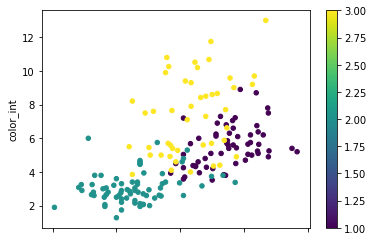

In [278]:
drink_data.plot(kind='scatter', \
                x='alco', y='color_int', marker = 'o', \
                c = drink_data['cultivar'], colormap='viridis')


In [285]:
drink_logreg = LogisticRegression()

#declare distribution
param_dist5 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}

# Run randomized hyperparameter search
random_search5 = \
    RandomizedSearchCV(drink_logreg, param_distributions=param_dist5,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search5.fit(X, y[:,0])
# print('RandBestEstimator4=', random_search4.best_estimator_)
print("Results for the first cultivar")
print('RandBestParams5=', random_search5.best_params_)
print('RandBestScore5=', -random_search5.best_score_)

random_search5.fit(X, y[:,1])
# print('RandBestEstimator4=', random_search4.best_estimator_)
print("Results for the seconnd cultivar")
print('RandBestParams5=', random_search5.best_params_)
print('RandBestScore5=', -random_search5.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Results for the first cultivar
RandBestParams5= {'C': 9.24654770121083, 'penalty': 'l1'}
RandBestScore5= 0.11931818181818182
Results for the seconnd cultivar
RandBestParams5= {'C': 6.267110564436484, 'penalty': 'l2'}
RandBestScore5= 0.028409090909090908


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Question 4.c: Using Random Forest

In [286]:
# Randomizing to tune the hyperparameters

# Fine tune hyperparameters
drink_tree = RandomForestClassifier()
#declare distribution
param_dist6 = {'n_estimators': [10, 200],
    'max_depth': [2, 4],
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(2, 20), 
    'max_features': sp_randint(1, 4)}

# Run randomized hyperparameter search
random_search6 = \
    RandomizedSearchCV(drink_tree, param_distributions=param_dist6,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search6.fit(X, y[:,0])
# print('RandBestEstimator4=', random_search4.best_estimator_)
print("Results for the first cultivar")
print('RandBestParams5=', random_search6.best_params_)
print('RandBestScore5=', -random_search6.best_score_)

random_search6.fit(X, y[:,1])
# print('RandBestEstimator4=', random_search4.best_estimator_)
print("Results for the seconnd cultivar")
print('RandBestParams5=', random_search6.best_params_)
print('RandBestScore5=', -random_search6.best_score_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Results for the first cultivar
RandBestParams5= {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
RandBestScore5= 0.07386363636363637
Results for the seconnd cultivar
RandBestParams5= {'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 10}
RandBestScore5= 0.056818181818181816


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Question 4.d:

In [287]:
#Declare SVM
drink_svc = svm.SVC()

#declare distribution
param_dist7 = {'C': sp_uniform(loc=0.1, scale=10.0),
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False]}

# Run randomized hyperparameter search
random_search7 = \
    RandomizedSearchCV(drink_svc, param_distributions=param_dist7,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search7.fit(X, y[:,0])
# print('RandBestEstimator4=', random_search4.best_estimator_)
print("Results for the first cultivar")
print('RandBestParams5=', random_search7.best_params_)
print('RandBestScore5=', -random_search7.best_score_)

random_search7.fit(X, y[:,1])
# print('RandBestEstimator4=', random_search4.best_estimator_)
print("Results for the second cultivar")
print('RandBestParams7=', random_search7.best_params_)
print('RandBestScore7=', -random_search7.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Results for the first cultivar
RandBestParams5= {'C': 0.17530155344974588, 'gamma': 'scale', 'shrinking': False}
RandBestScore5= 0.08522727272727272
Results for the second cultivar
RandBestParams7= {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}
RandBestScore7= 0.022727272727272728


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Question 4.e: Neural Networks

In [288]:
from sklearn.neural_network import MLPClassifier
#Declare Neural Network
drink_neural = MLPClassifier()

#declare distribution
param_dist8 = {'hidden_layer_sizes': sp_randint(1, 100),
    'activation': ['logistic', 'relu'],
    'alpha': sp_uniform(0.1, 10.0)}

# Run randomized hyperparameter search
random_search8 = \
    RandomizedSearchCV(drink_neural, param_distributions=param_dist8,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search8.fit(X, y[:,0])
# print('RandBestEstimator4=', random_search4.best_estimator_)
print("Results for the first cultivar")
print('RandBestParams8=', random_search8.best_params_)
print('RandBestScore8=', -random_search8.best_score_)

random_search8.fit(X, y[:,1])
# print('RandBestEstimator4=', random_search4.best_estimator_)
print("Results for the second cultivar")
print('RandBestParams8=', random_search8.best_params_)
print('RandBestScore8=', -random_search8.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Results for the first cultivar
RandBestParams8= {'activation': 'logistic', 'alpha': 5.093252774590083, 'hidden_layer_sizes': 90}
RandBestScore8= 0.10795454545454546
Results for the second cultivar
RandBestParams8= {'activation': 'relu', 'alpha': 1.6599670753042983, 'hidden_layer_sizes': 89}
RandBestScore8= 0.05113636363636364


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
